In [0]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set()

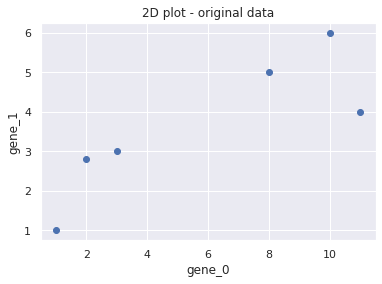

In [64]:
# Step I - Get data and visualize it
gene_0 = np.array([10, 11, 8, 3, 2, 1])
gene_1 = np.array([6, 4, 5, 3, 2.8, 1])
gene_2 = np.array([12, 9, 10, 2.5, 1.3, 2])

plt.scatter(gene_0, gene_1)
plt.xlabel('gene_0')
plt.ylabel('gene_1')
plt.title('2D plot - original data')

X = np.c_[gene_0, gene_1]

Text(0, 0.5, 'gene_1')

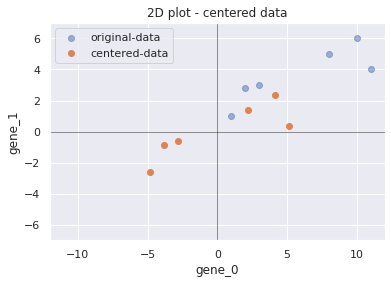

In [65]:
X_centered = X - X.mean(axis=0)

plt.scatter(gene_0, gene_1, alpha=0.5, label='original-data')
plt.scatter(X_centered[:, 0], X_centered[:, 1],  label='centered-data')
plt.axhline(0, c='k', lw=0.5)
plt.axvline(0, c='k', lw=0.5)
plt.title('2D plot - centered data')
plt.legend()
plt.xlim(-12, 12)
plt.ylim(-7, 7)
plt.xlabel('gene_0')
plt.ylabel('gene_1')

In [73]:
U, s, V = np.linalg.svd(X_centered)
c1 = V.T[:, 0]
c2 = V.T[:, 1]

print(c1)
print(c2)

[-0.94171069 -0.33642381]
[-0.33642381  0.94171069]


PCA signular values: [10.31600994638049 2.0116176209323418]
Gene 0 percent variation: 0.96
Gene 1 percent variation: 0.04


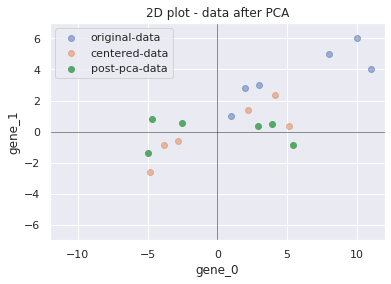

In [110]:
X2D = X_centered.dot(V.T[:, :2])

plt.scatter(gene_0, gene_1, alpha=0.5, label='original-data')
plt.scatter(X_centered[:, 0], X_centered[:, 1], alpha=0.5, label='centered-data')
plt.scatter(X2D[:, 0], X2D[:, 1], label='post-pca-data')
plt.axhline(0, c='k', lw=0.5)
plt.axvline(0, c='k', lw=0.5)
plt.title('2D plot - data after PCA')
plt.legend()
plt.xlim(-12, 12)
plt.ylim(-7, 7)
plt.xlabel('gene_0')
plt.ylabel('gene_1')


print('PCA signular values: [{} {}]'.format(np.sqrt(sum([np.square(x[0]) for x in X2D])), 
                                            np.sqrt(sum([np.square(x[1]) for x in X2D]))))

gene0_var = sum([np.square(x[0]) for x in X2D]) / (X2D.shape[0] - 1)
gene1_var = sum([np.square(x[1]) for x in X2D]) / (X2D.shape[0] - 1)

print(f'Gene 0 percent variation: {gene0_var / (gene0_var + gene1_var):.2f}') 
print(f'Gene 1 percent variation: {gene1_var / (gene0_var + gene1_var):.2f}')


PCA signular values: [10.31600995  2.01161762]
Gene 0 percent variation: 0.96
Gene 1 percent variation: 0.04


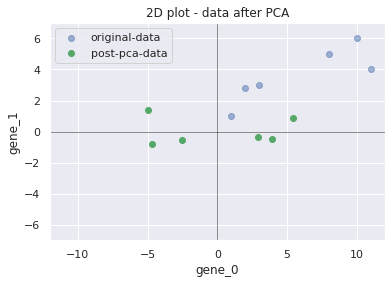

In [109]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

plt.scatter(gene_0, gene_1, alpha=0.5, label='original-data')
plt.scatter(100, 100)
plt.scatter(X2D[:, 0], X2D[:, 1], label='post-pca-data')
plt.axhline(0, c='k', lw=0.5)
plt.axvline(0, c='k', lw=0.5)
plt.title('2D plot - data after PCA')
plt.legend()
plt.xlim(-12, 12)
plt.ylim(-7, 7)
plt.xlabel('gene_0')
plt.ylabel('gene_1')

print('PCA signular values:',pca.singular_values_)
print(f'Gene 0 percent variation: {pca.explained_variance_ratio_[0]:.2f}') 
print(f'Gene 1 percent variation: {pca.explained_variance_ratio_[1]:.2f}')